## Random Forest Regression
### Advantages: Powerful and accurate, good performance on many problems including non-linear
### Disadvantages: No interpretability, overfitting can easily occur, need to choose number of trees

In [1]:
# Demo of Random Forest regression technique
# Random Forest = lots of Decision Trees! So it's discrete, not continuous...
# Preprocess the data
import os
import pandas as pd

DATASET_PATH = "datasets/pos_salaries"
DATASET_URL = DATASET_PATH + "/Position_Salaries.csv"

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_data()

In [2]:
# Define X and y arrays, dataset too small for train/test set
def load_data(dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, "Position_Salaries.csv")
    return pd.read_csv(csv_path)

dataset = load_data()
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [12]:
# Define Random Forest Regressor, test to see how close 6,5yr estimate is to $160k
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X, y)

y_pred = regressor.predict(6.5)
print("Estimated salary: %.2f" % y_pred)

Estimated salary: 160600.00


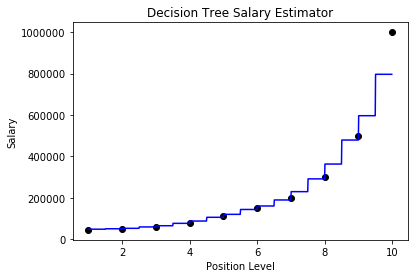

In [13]:
# Visualize the results
import matplotlib.pyplot as plt
import numpy as np

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color='black')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title("Decision Tree Salary Estimator")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [14]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 4196826600.00
Variance score: 0.95
